# Exploratory Data Analysis - Titanic

### Note : You can get the data from this kaggle [link]('https://www.kaggle.com/c/titanic/download/train.csv') 

## Following topics will be covered in this data analysis - ![topics](exploratory-data-analysis-checklist.png)

## 1. Reading the data

In [2]:
import pandas as pd

titanic_data = pd.read_csv('data/train.csv')

### Print the first 5 rows to get an overview of the dataset.

In [3]:
titanic_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## 2. Variable Identification

### Print the data type information regarding all the columns.

In [4]:
titanic_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### Describe the statistics regarding continous variables.

In [5]:
titanic_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### Describe the statistics regarding categorical variables.

In [6]:
import numpy as np

titanic_data.describe(include=[np.object])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Faunthorpe, Mrs. Lizzie (Elizabeth Anne Wilkin...",male,CA. 2343,G6,S
freq,1,577,7,4,644


### Does the dataframe contains any null value? If yes, count of null values.

In [7]:
print(titanic_data.isnull().any())

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool


### Print the count of null values in the dataframe.

In [8]:
print("Null values in Age column are ", titanic_data.Age.isna().sum())
print("Null values in Cabin column are ", titanic_data.Cabin.isna().sum())
print("Null values in Embarked column are ", titanic_data.Embarked.isna().sum())

Null values in Age column are  177
Null values in Cabin column are  687
Null values in Embarked column are  2


## 3. Univariate Analysis

### Continuous Variable

### Categorical Variable

### a. Continuous Variable - Analyzing Age column.

### Print the Mean, Median, Standard Deviation and Describe the age column data.

In [9]:
print("Mean of the age column is - ", titanic_data.Age.mean())
print("Median of the age column is - ", titanic_data.Age.median())
print("Standard Deviation of the age column is - ", titanic_data.Age.std())
print("Description regarding age column.")
titanic_data.Age.describe()

Mean of the age column is -  29.69911764705882
Median of the age column is -  28.0
Standard Deviation of the age column is -  14.526497332334042
Description regarding age column.


count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

### Display the distribution of the data visually

In [10]:
import matplotlib.pyplot as plt

c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:746: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\numpy\lib\histograms.py:747: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


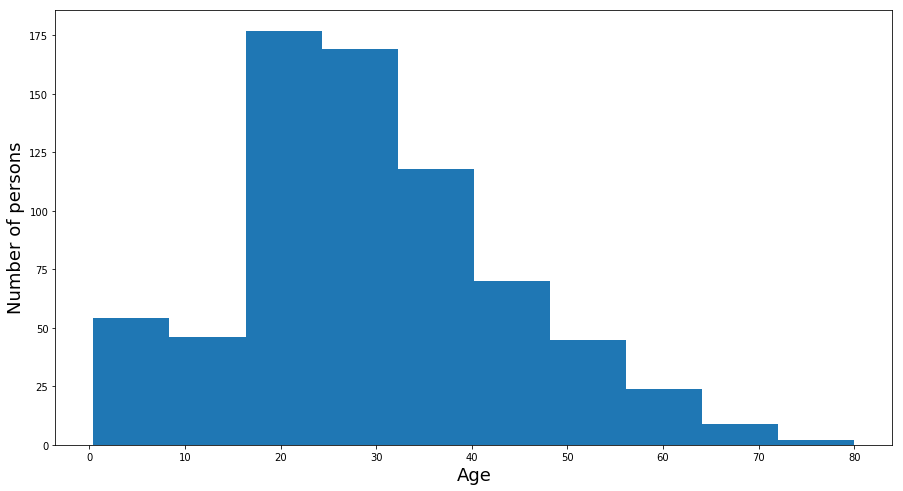

In [11]:
plt.figure(figsize=(15, 8))
plt.hist(titanic_data.Age)
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
plt.savefig('visualizations/Age-Distribution.png')

### Create bins for age column.

In [12]:
age_data = pd.cut(titanic_data.Age, bins=[0, 10, 20, 30, 40, 50, 60, 70, 80])

In [13]:
print(age_data.value_counts().sort_index(ascending=True))

(0, 10]      64
(10, 20]    115
(20, 30]    230
(30, 40]    155
(40, 50]     86
(50, 60]     42
(60, 70]     17
(70, 80]      5
Name: Age, dtype: int64


### Determine the outliers using the box plot

In [14]:
import seaborn as sns

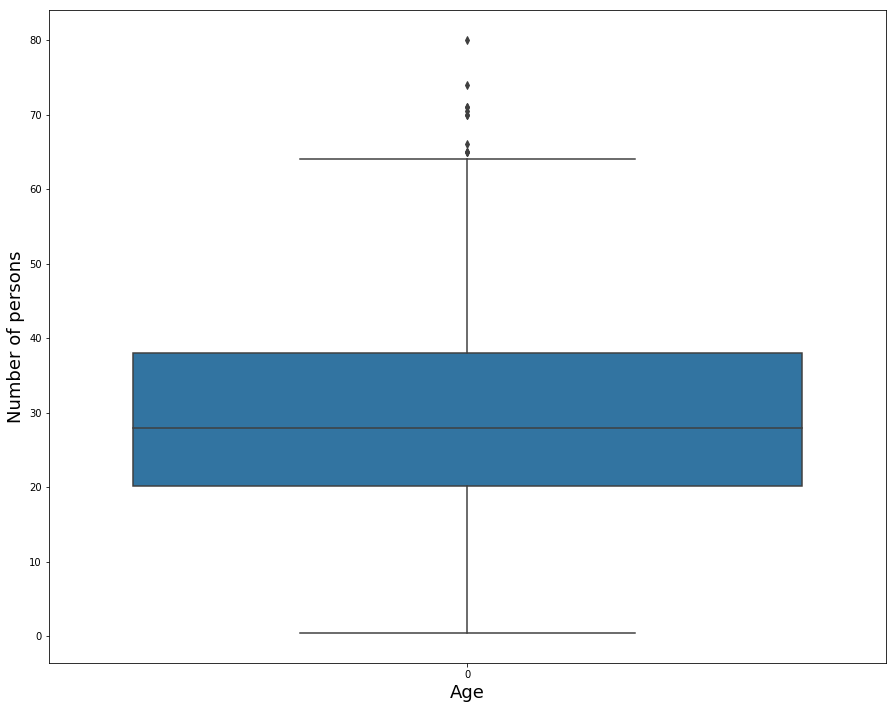

In [15]:
fig, ax = plt.subplots(figsize=(15, 12))
font = {'size' : 18 }
plt.xlabel('Age', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)
sns.boxplot(data=titanic_data.Age, ax=ax)
plt.savefig('visualizations/Age-Outliers.png')

### b. Categorical Variable - Analyzing sex column.

### Count the number of values that we have for sex column.

In [16]:
titanic_data.Sex.value_counts()

male      577
female    314
Name: Sex, dtype: int64

### Print the percentage of each value.

In [17]:
total_passenger_on_board = titanic_data.Sex.count()

percentage_female_passengers = (titanic_data['Sex'][titanic_data['Sex']=='female'].count()/total_passenger_on_board) * 100
print('Total female passengers on board ', percentage_female_passengers)

percentage_male_passengers = (titanic_data['Sex'][titanic_data['Sex']=='male'].count()/total_passenger_on_board) * 100
print('Total male passengers on board ', percentage_male_passengers)

Total female passengers on board  35.24130190796858
Total male passengers on board  64.75869809203144


### Display the bar chart gender we have on board.

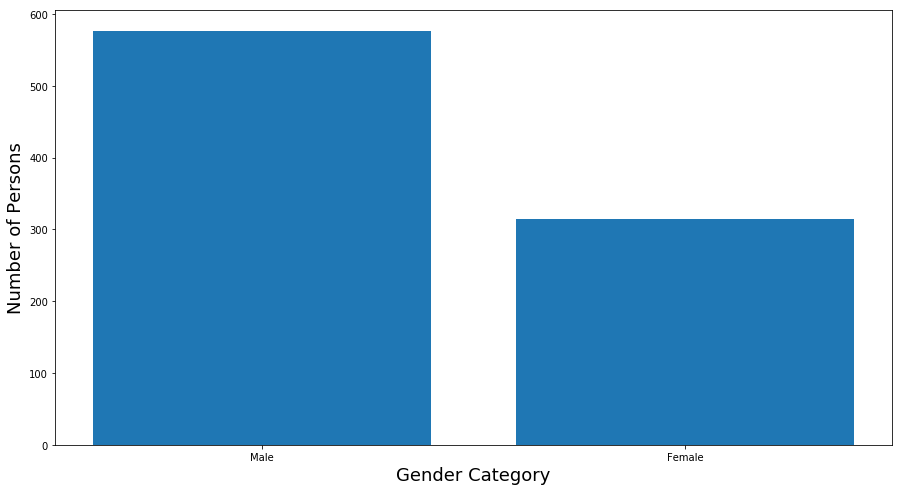

In [18]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender Category', fontdict=font)
plt.ylabel('Number of Persons', fontdict=font)
plt.bar(x=['Male', 'Female'], height=titanic_data['Sex'].value_counts())
plt.savefig('visualizations/Gender-Distribution')

## 4. Bivariate Analysis

### Continuous - Continuous variable analysis.

### Continuous - Categorical variable analysis.

### Categorical - Categorical variable analysis.

### 1. Continuous-Continuous variable analysis (Fare vs Age)

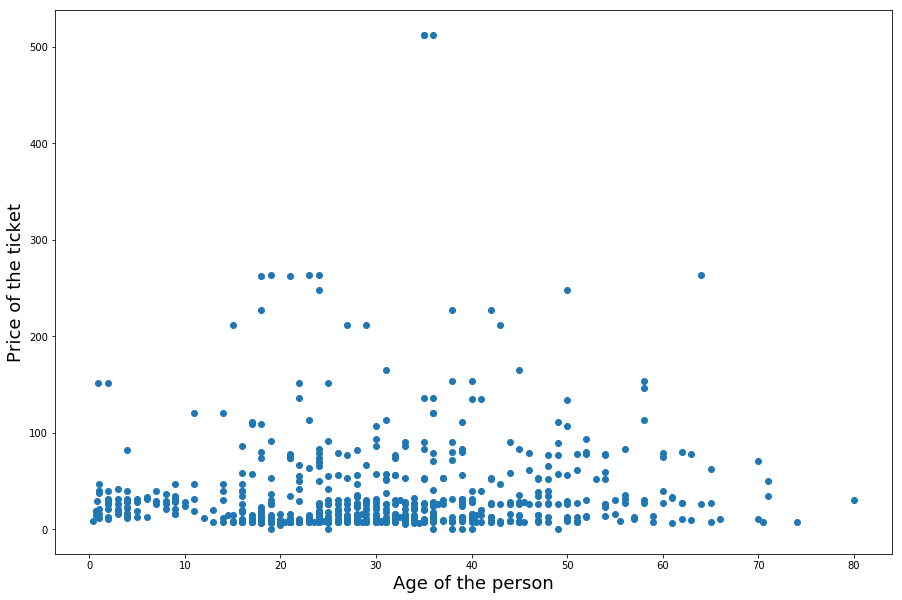

In [19]:
plt.figure(figsize=(15,10))
plt.xlabel('Age of the person', fontdict=font)
plt.ylabel('Price of the ticket', fontdict=font)
plt.scatter(x=titanic_data['Age'], y=titanic_data['Fare'])
plt.savefig('visualizations/Fare-Age-Analysis')

### Print the correlation between 'Fare' and 'Age' column - 

In [20]:
titanic_data['Age'].corr(titanic_data['Fare'])

0.09606669176903894

### 2. Continuous - Categorical variable analysis (Age vs Sex)

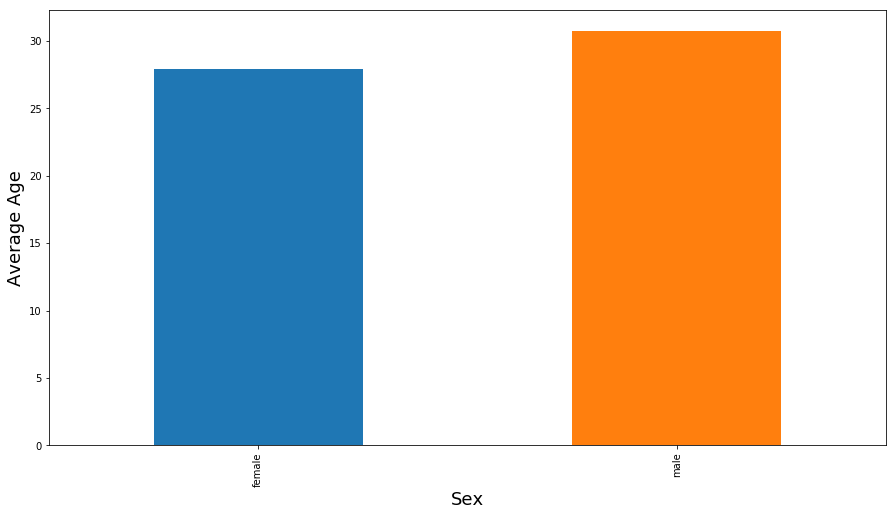

In [21]:
plt.figure(figsize=(15, 8))
plt.xlabel('Gender', fontdict=font)
plt.ylabel('Average Age', fontdict=font)
titanic_data.groupby('Sex')['Age'].mean().plot.bar()
plt.savefig('visualizations/Age-Gender-Analysis')

### Perform the t-test for Sex and Age of the passengers

In [22]:
from scipy.stats import ttest_ind

In [23]:
males_age = titanic_data['Age'][titanic_data['Sex']=='male']
females_age = titanic_data['Age'][titanic_data['Sex']=='female']

ttest_ind(males_age, females_age, nan_policy='omit')

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

### 3. Categorical-Categorical Bivariate analysis (Sex vs Survived)

In [24]:
pd.crosstab(titanic_data['Sex'], titanic_data['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


### Print the stacked column chart to describe the gender of the person who survived

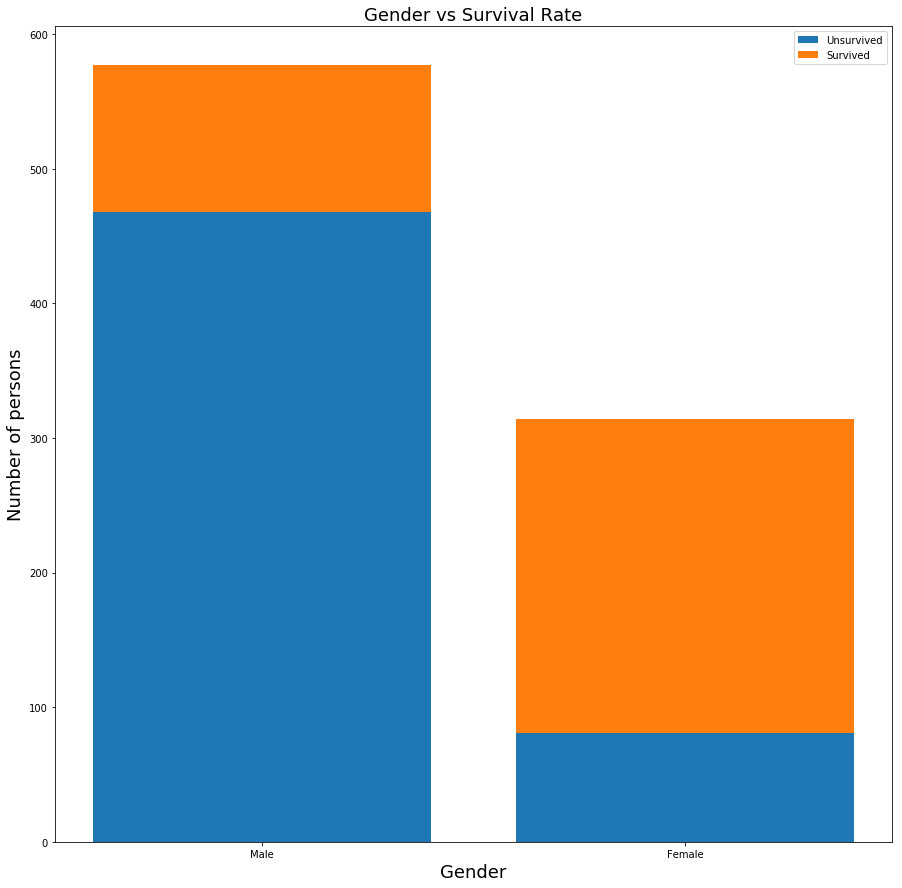

In [25]:
# unsurvived data
unsurvived_males_data = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==0)].shape[0]
unsurvived_females_data = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==0)].shape[0]

# survived data
survived_males_data = titanic_data['Sex'][(titanic_data['Sex']=='male') & (titanic_data['Survived']==1)].shape[0]
survived_females_data = titanic_data['Sex'][(titanic_data['Sex']=='female') & (titanic_data['Survived']==1)].shape[0]

plt.figure(figsize=(15, 15))

# plotting data
p1 = plt.bar(x='Male', height=unsurvived_males_data, color='#1F77B4')
p2 = plt.bar(x='Female', height=unsurvived_females_data, color='#1F77B4')
p3 = plt.bar(x='Male', bottom=unsurvived_males_data, height=survived_males_data, color='#ff7f0e')
p4 = plt.bar(x='Female', bottom=unsurvived_females_data, height=survived_females_data, color='#ff7f0e')

plt.xlabel('Gender', fontdict=font)
plt.ylabel('Number of persons', fontdict=font)

plt.legend((p1, p3), ('Unsurvived', 'Survived'))
plt.title('Gender vs Survival Rate', fontdict=font)
plt.savefig('visualizations/Gender-Age-Analysis.png')
plt.show()

### Perform the chi-square test

In [26]:
from scipy.stats import chi2_contingency

In [27]:
chi2_contingency(pd.crosstab(titanic_data['Sex'], titanic_data['Survived']))

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

## 5. Outlier Detection and Treatment

### Detecting Missing values in our dataframe.

In [28]:
titanic_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Removing, Treating missing in Age variable.

In [29]:
# Remove
missing_values_removed = titanic_data.dropna()
missing_values_removed.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [30]:
# Filling up missing values
clean_data = titanic_data
clean_data.Age = clean_data.Age.fillna(titanic_data.Age.mean())
clean_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

### Checking outliers

### Treating outliers

In [31]:
# Detecting outlier values
outlier_values = titanic_data['Age'][titanic_data['Age']>65]
print(outlier_values)

33     66.0
96     71.0
116    70.5
493    71.0
630    80.0
672    70.0
745    70.0
851    74.0
Name: Age, dtype: float64


c:\users\jatinder\appdata\local\programs\python\python36\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


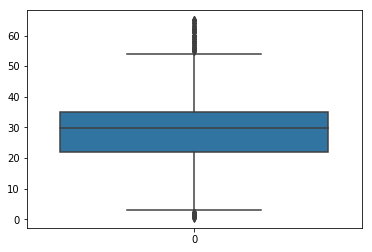

In [32]:
# titanic_data.isnull().sum()
titanic_data['Age'][titanic_data['Age']>65] = titanic_data.Age.mean()
# print(new_data['Age'])
sns.boxplot(data = titanic_data.Age)

## 6. Variable Transformation

### Check the distribution of age variable.

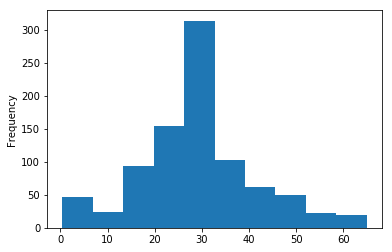

In [34]:
titanic_data['Age'].plot.hist()

### Creating bins

In [38]:
bins = [0, 10, 20, 30, 40, 50, 60, 70]
groups = ['Children', 'Teen', 'Adolescence', 'Adults', 'Married', 'Parents', 'Senior Citizens']
age_groups = pd.cut(titanic_data.Age, bins=bins, labels=groups)

In [39]:
age_groups

0      Adolescence
1           Adults
2      Adolescence
3           Adults
4           Adults
5      Adolescence
6          Parents
7         Children
8      Adolescence
9             Teen
10        Children
11         Parents
12            Teen
13          Adults
14            Teen
15         Parents
16        Children
17     Adolescence
18          Adults
19     Adolescence
20          Adults
21          Adults
22            Teen
23     Adolescence
24        Children
25          Adults
26     Adolescence
27            Teen
28     Adolescence
29     Adolescence
          ...     
861    Adolescence
862        Married
863    Adolescence
864    Adolescence
865        Married
866    Adolescence
867         Adults
868    Adolescence
869       Children
870    Adolescence
871        Married
872         Adults
873        Married
874    Adolescence
875           Teen
876           Teen
877           Teen
878    Adolescence
879        Parents
880    Adolescence
881         Adults
882    Adole

In [40]:
age_groups.value_counts()

Adolescence        415
Adults             155
Teen               115
Married             86
Children            64
Parents             42
Senior Citizens     14
Name: Age, dtype: int64